In [13]:
import numpy as np
import pandas as pd
import sklearn

np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, formatter=dict(float=lambda x: f'{x:.2f}'))

### 1. Data

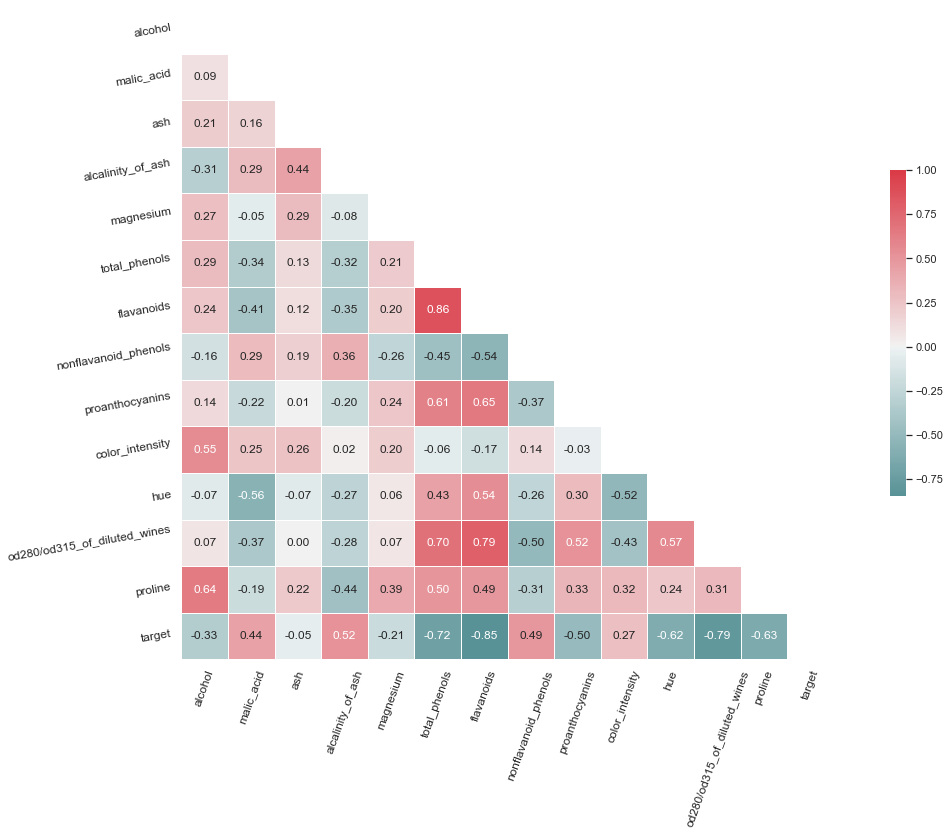

In [26]:
%run "./Dataset - wines.ipynb"

In [46]:
df = df_raw.copy()
df = df.drop(columns='target_names')
df.target = df.target.astype('int8')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [48]:
data = df.copy()
target = data.pop('target')

In [50]:
target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### Feature Selection-Information gain - mutual information In Classification Problem Statements
Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**


Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

### 1. Train/test split - is a must to avoid overfitting

In [51]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data, target,stratify=target, test_size=0.3, random_state=42)
print (f'Data shape: {data.shape}')
print (f'Target shape: {target.shape}\n')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}\n')

print (f'Train ratio: {len(X_train)/len(data)}')
print (f'Test ratio: {len(X_test)/len(data)}\n')

print(f'target dist:')
print (f'{pd.Series(target).value_counts() / len(target)}\n')

print(f'train target dist:')
print (f'{pd.Series(y_train).value_counts() / len(y_train)}\n')

print(f'test target dist:')
print (f'{pd.Series(y_test).value_counts() / len(y_test)}\n')

Data shape: (178, 13)
Target shape: (178,)

X_train: (124, 13)
y_train: (124,)
X_test: (54, 13)
y_test: (54,)

Train ratio: 0.6966292134831461
Test ratio: 0.30337078651685395

target dist:
1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

train target dist:
1    0.403226
0    0.330645
2    0.266129
Name: target, dtype: float64

test target dist:
1    0.388889
0    0.333333
2    0.277778
Name: target, dtype: float64



### 2. Library for IG, MI:

- determine the mutual information (by IG and entropy -math pattern above)





In [59]:
from sklearn.feature_selection import mutual_info_classif

In [64]:
mi = mutual_info_classif(X_train, y_train)

In [63]:
# array of Mutual Information, range (0,1), 0 - no dependency, 0 < - higher dependency between x and y (higher influence for target)
# the highest value - the most important variable
mi

array([0.51, 0.33, 0.14, 0.20, 0.23, 0.40, 0.67, 0.12, 0.27, 0.59, 0.43, 0.51, 0.52])

#### - how to get MI with names

In [70]:
mi_series = pd.Series(mi)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False, inplace=True)
mi_series

flavanoids                      0.664958
color_intensity                 0.601464
proline                         0.524644
od280/od315_of_diluted_wines    0.496412
alcohol                         0.494155
hue                             0.426917
total_phenols                   0.385339
malic_acid                      0.333231
proanthocyanins                 0.279919
magnesium                       0.247937
alcalinity_of_ash               0.205785
nonflavanoid_phenols            0.161432
ash                             0.154117
dtype: float64

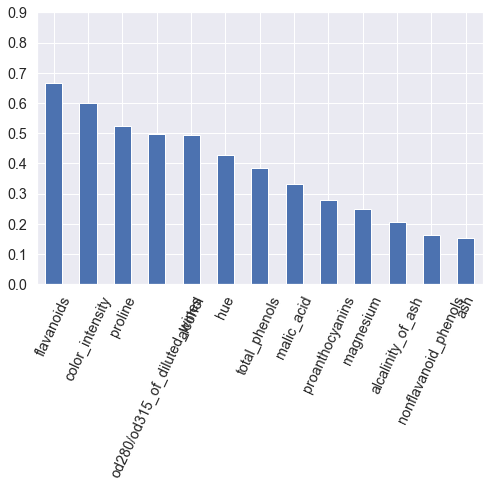

In [81]:
import seaborn as sns
sns.set(font_scale=1.3)
mi_series.plot.bar(figsize=(8,5), rot=65, yticks=np.arange(0,1,0.1));

#### It's no necessary to take all variables for model, sometime top5, if more variables in data - top10, top20 ?

### 3. Select features

In [82]:
from sklearn.feature_selection import SelectKBest

In [89]:
# 5 top variables
select_5 = SelectKBest(mutual_info_classif, k=5)
select_5.fit(X_train, y_train)

# all columns
X_train.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,13.75,1.73,2.41,16.0,89.0,2.6,2.76,0.29,1.81,5.6,1.15,2.90,1320.0
30,13.73,1.50,2.70,22.5,101.0,3.0,3.25,0.29,2.38,5.7,1.19,2.71,1285.0


In [94]:
# choose col with selected variables
top_col_5 = X_train.columns[select_5.get_support()]

In [96]:
X_train[top_col_5].head(2)

,alcohol,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
12,13.75,2.76,5.6,2.90,1320.0
30,13.73,3.25,5.7,2.71,1285.0


In [110]:
select_5.transform(X_test)[:3, :]

array([[13.16, 3.24, 5.68, 3.17, 1185.00],
       [12.17, 1.75, 2.95, 2.23, 355.00],
       [14.19, 3.93, 8.70, 2.82, 1680.00]])

In [106]:
X_test[top_col_5].head(3)

,alcohol,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
2,13.16,3.24,5.68,3.17,1185.0
64,12.17,1.75,2.95,2.23,355.0
18,14.19,3.93,8.70,2.82,1680.0


### 4. Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.